# Importing the Libraries

In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [377]:
dataset = pd.read_csv('bank-additional-full.csv', sep=';', quotechar='"')

In [378]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [379]:
dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [380]:
dataset.shape

(41188, 21)

### Determining the number of missing values

In [381]:
dataset.isin(['unknown']).sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [382]:
dataset_copy = dataset.copy()

In [383]:
def change_column_type_object_to_categorical(df):
    object_columns = df.select_dtypes(include=['object']).columns.tolist()
    for column in object_columns:
        df[column] = pd.Categorical(df[column])

In [384]:
change_column_type_object_to_categorical(dataset_copy)
dataset_copy.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

### Reordering the columns order as numerical to categorical

In [385]:
# Separate numerical and categorical columns
numerical_columns = dataset_copy.select_dtypes(include='number').columns.tolist()
categorical_columns = dataset_copy.select_dtypes(exclude='number').columns.tolist()

# Reorder columns
new_order = numerical_columns + categorical_columns
dataset_copy = dataset_copy[new_order]
dataset_copy.dtypes

age                  int64
duration             int64
campaign             int64
pdays                int64
previous             int64
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
poutcome          category
y                 category
dtype: object

## Required Function definitions:

In [386]:
def visualize_features(df,column_name):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column_name, kde=True, color='skyblue')
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [387]:
def visualize_target_feature(df,column_name):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column_name, hue='y', multiple='stack', palette='Set2')
    plt.title(f"Distribution of 'y' within {column_name} Groups")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [388]:
def visualize_outliers(df, column_name):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=column_name, color='skyblue')
    plt.title(f"Boxplot of {column_name} (with Outliers)")
    plt.xlabel(column_name)
    plt.tight_layout()
    plt.show()

In [389]:
def visualize(df,column_name):
    visualize_features(df,column_name)
    visualize_target_feature(df,column_name)
    visualize_outliers(df, column_name)

In [390]:
def remove_outliers_by_quantiles(df, column_name, lower_quantile=0.02, upper_quantile=0.98):
    lower_bound = df[column_name].quantile(lower_quantile)
    upper_bound = df[column_name].quantile(upper_quantile)
    df.drop(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)].index, inplace=True)

In [391]:
def extract_feature_by_thresholds(df,col_name,thresholds):
    labels = []
    for i in range(len(thresholds) - 1):
        label = f"{col_name}_({thresholds[i]}_{thresholds[i+1]}]"
        mask = (df[col_name] > thresholds[i]) & (df[col_name] <= thresholds[i+1])
        df.loc[mask, f'{col_name}_group'] = label
        labels.append(label)

In [392]:
def print_extract_feature_by_thresholds(df,col_name,thresholds):
    percentages = {}
    total_samples = len(df)
    for i in range(len(thresholds) - 1):
        lower_bound = thresholds[i]
        upper_bound = thresholds[i + 1]
        mask = (df[col_name] > lower_bound) & (df[col_name] <= upper_bound)
        count = df.loc[mask].shape[0]
        percentage = (count / total_samples)
        rounded_percentage = round(percentage, 4)
        print(f"({lower_bound}_{upper_bound}] = {rounded_percentage}, samples:{count}")

In [393]:
def calculate_success_rate(df, feature_column, target_column, lower_bound,upper_bound):
    # Filter the DataFrame for the specific condition
    filtered_df = df[(df[feature_column] >= lower_bound) & (df[feature_column] <= upper_bound)].copy()
    # Group by the feature column and calculate the rate of 'yes' for each unique value
    grouped = filtered_df.groupby(feature_column)[target_column].apply(lambda x: (x == 'yes').mean())
    success_rate = grouped.mean()
    return grouped, success_rate


In [394]:
def generate_start_end_threshold(df, col_name, increment_range):
    start = df[col_name].min() - (df[col_name].min())%increment_range
    end = df[col_name].max() - (df[col_name].max())%increment_range + increment_range
    return start, end

In [395]:
def generate_threshold(df,col_name,increment_range):
    start, end = generate_start_end_threshold(df,col_name,increment_range)
    thresholds = []
    threshold = start
    while threshold <= end:
        thresholds.append(threshold)
        threshold += increment_range
    return thresholds


In [396]:
def correlation_heatmap(df,numerical_col):
    ## taking from https://github.com/bowcai/bank-analysis/blob/main/bank-analysis.ipynb
    fig= plt.figure(figsize=(8,8))

    corr = df[numerical_col].corr()
    mask = np.triu(df[numerical_col].corr())

    axes = fig.add_axes([0, 0, 1, 1])
    sns.heatmap(corr, annot=True, mask=mask, square=True,fmt='.2g',vmin=-1, vmax=1, center= 0, cmap='viridis',
            linecolor='white', cbar_kws= {'orientation': 'vertical'}, ax=axes)

## Handling outliers for numerical features

In [397]:
for col_name in numerical_columns:
    remove_outliers_by_quantiles(dataset_copy,col_name)

## Exploring the numerical columns

##### 1-) "Age"

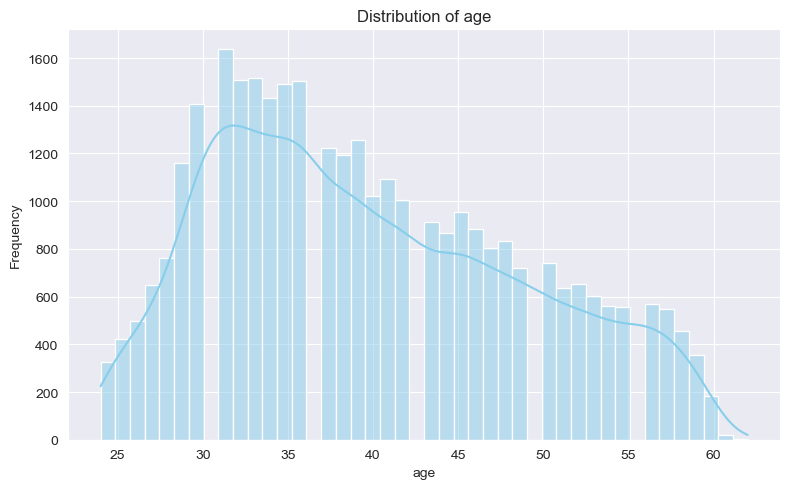

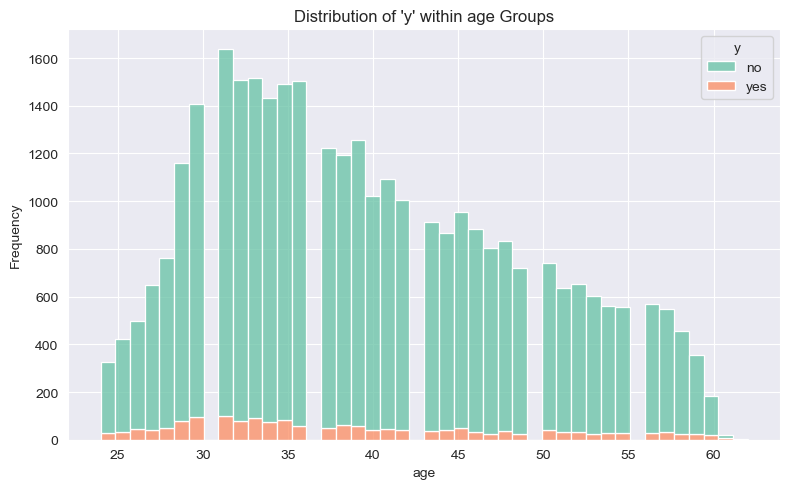

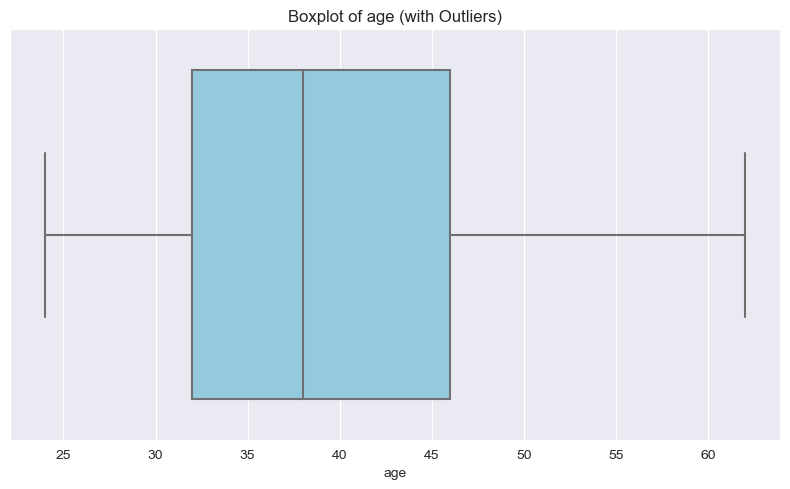

In [398]:
visualize(dataset_copy,'age')

##### 2-) "Duration"

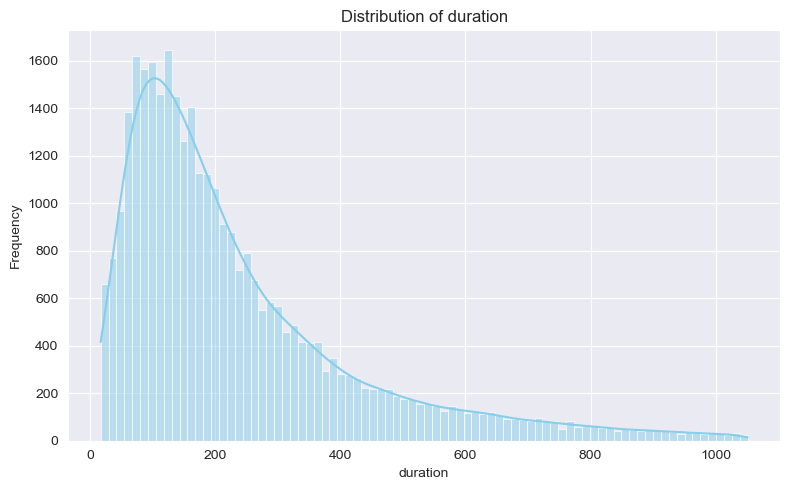

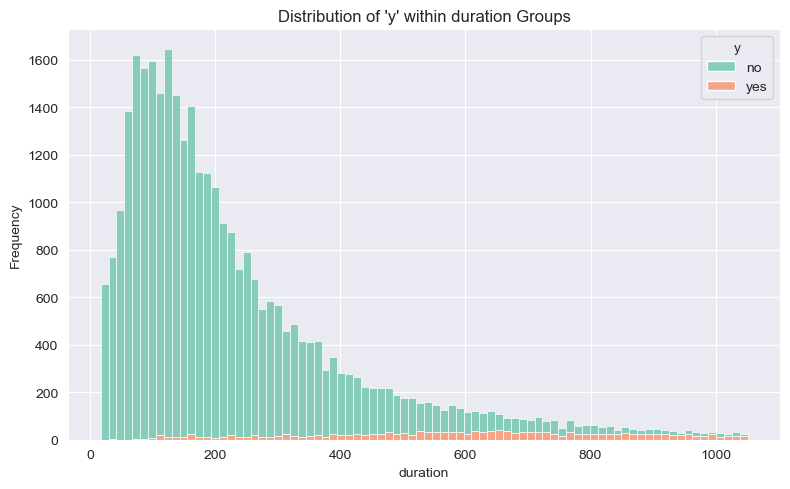

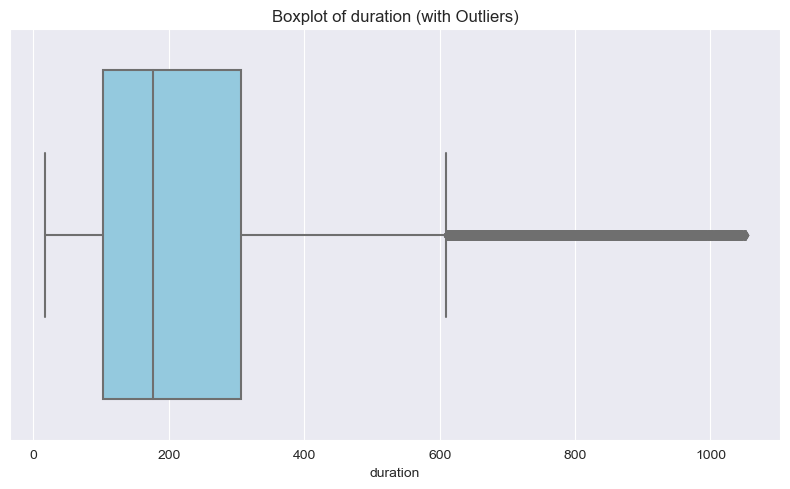

In [399]:
visualize(dataset_copy,'duration')

##### 3-) "Campaign"

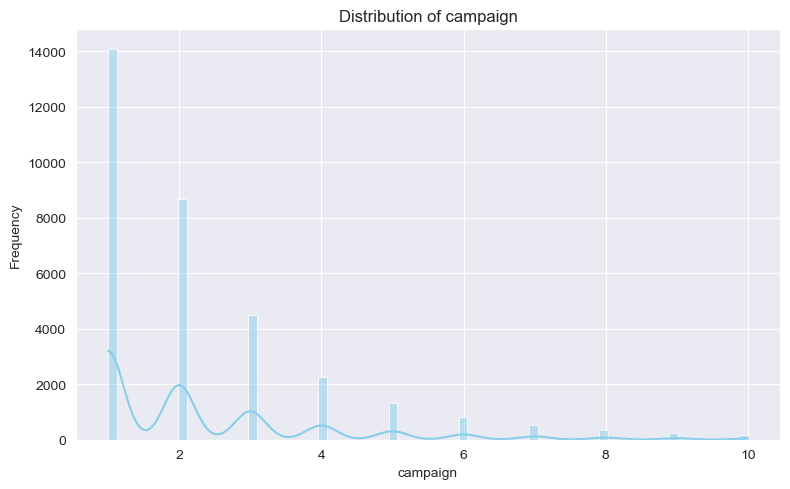

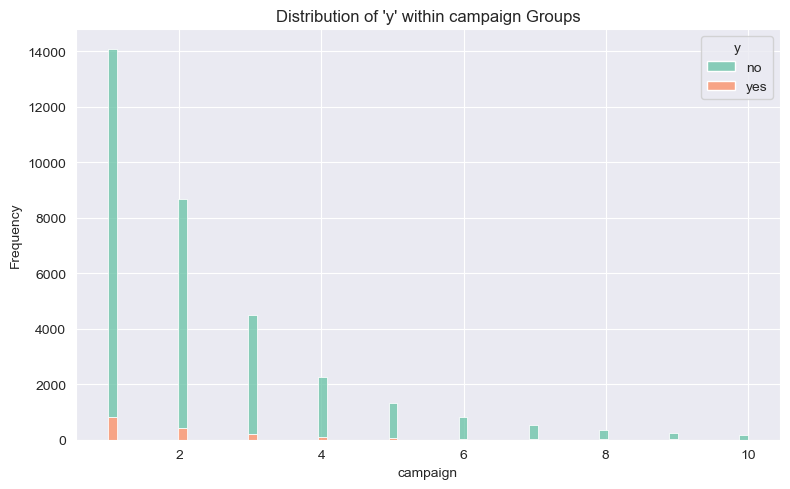

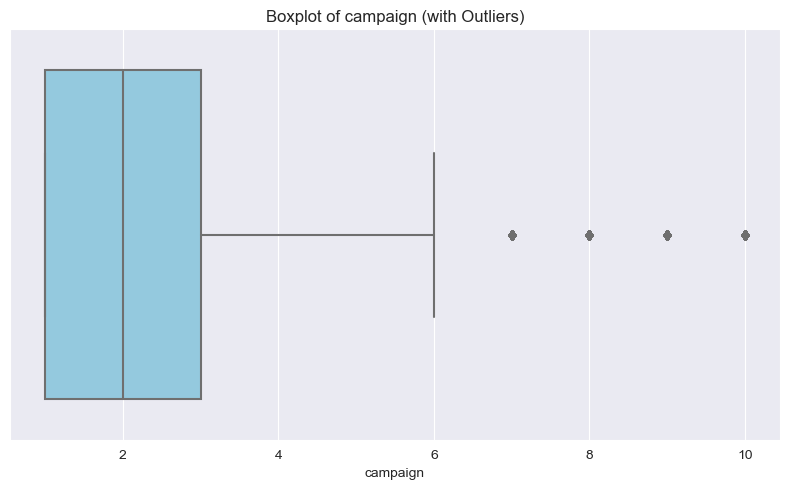

In [400]:
visualize(dataset_copy,'campaign')

##### 4-) "pdays"

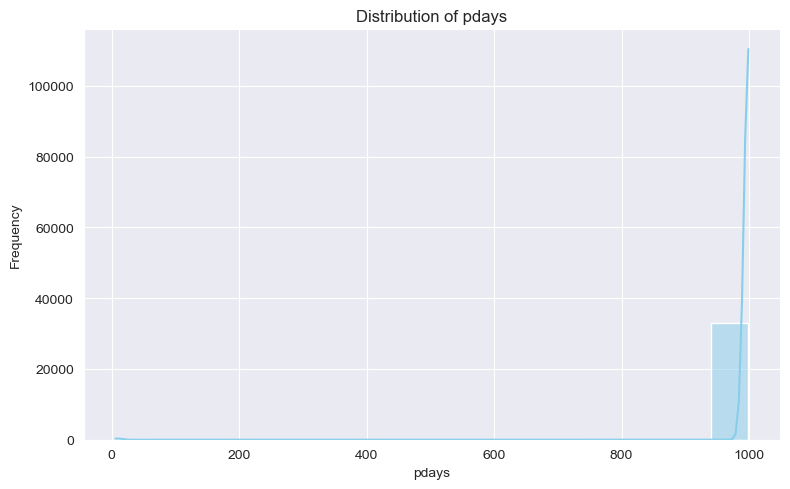

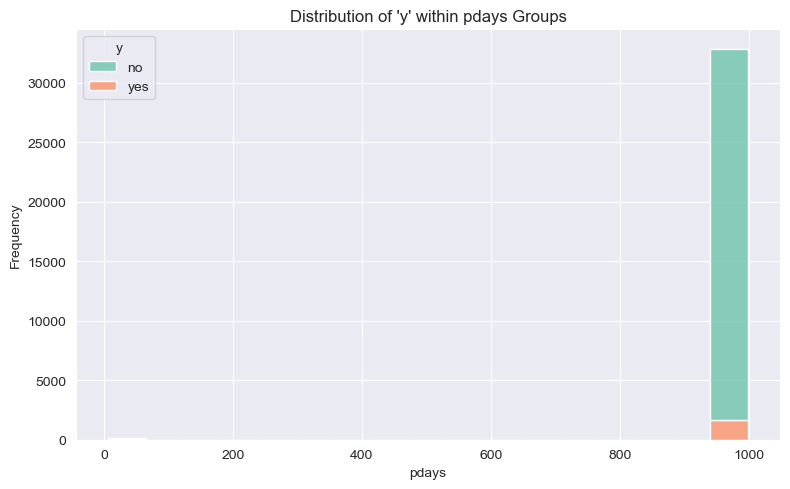

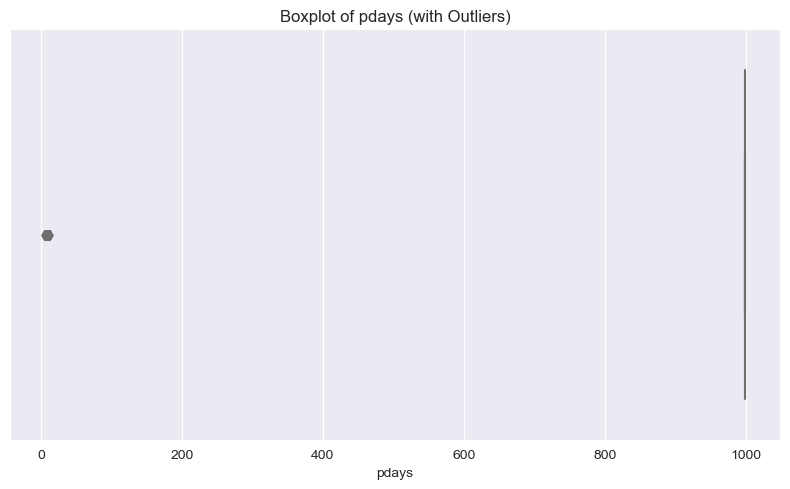

In [401]:
visualize(dataset_copy,'pdays')

##### 5-) "previous"

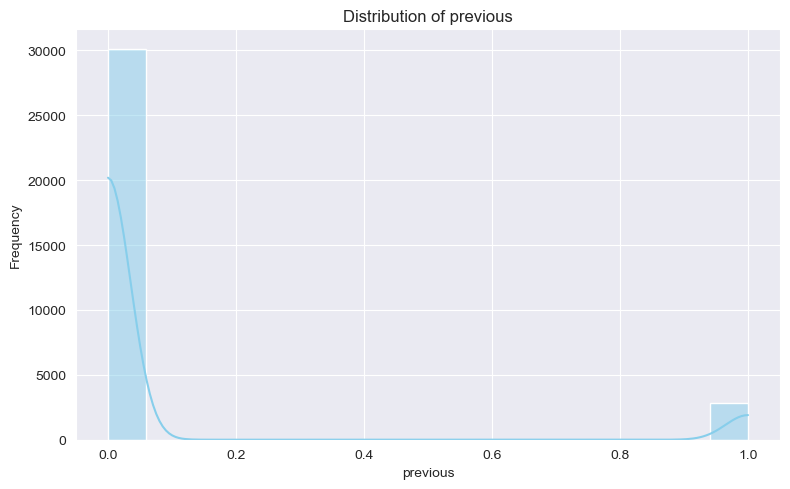

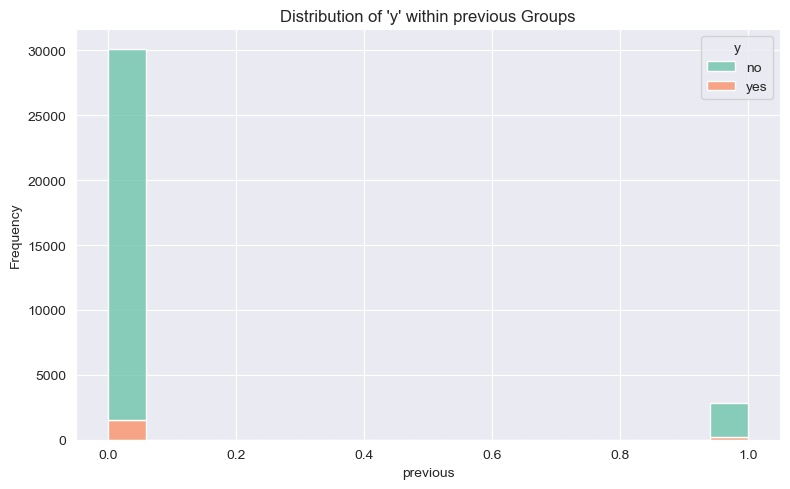

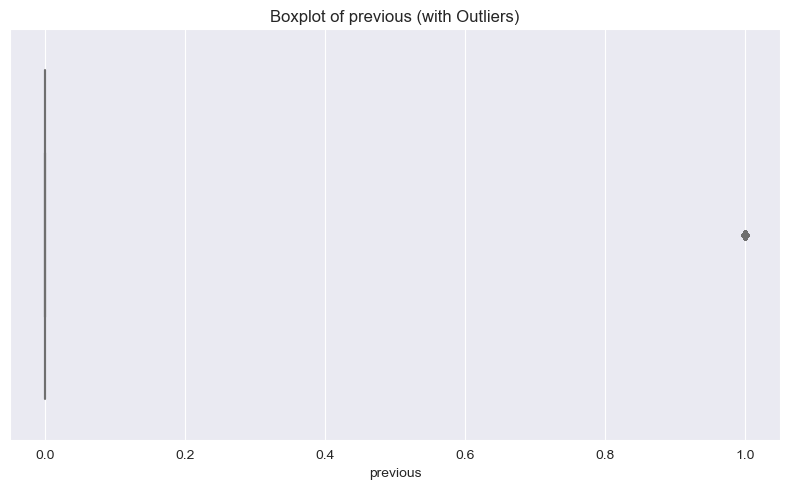

In [402]:
visualize(dataset_copy,'previous')

##### 6-) "emp.var.rate"

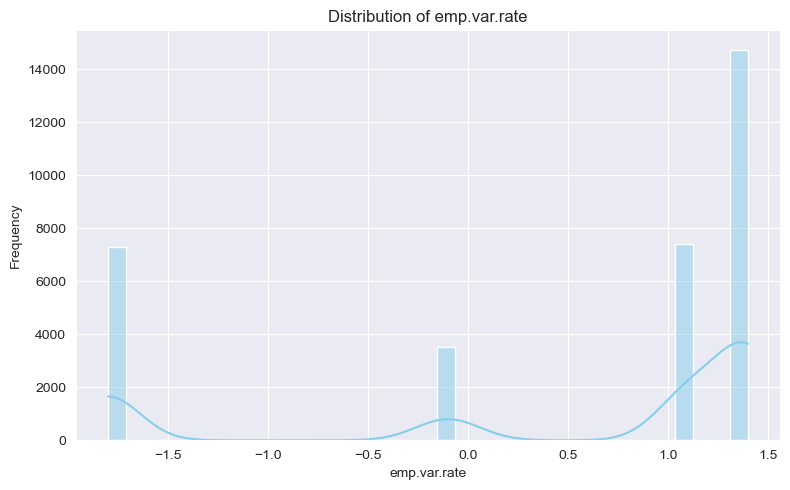

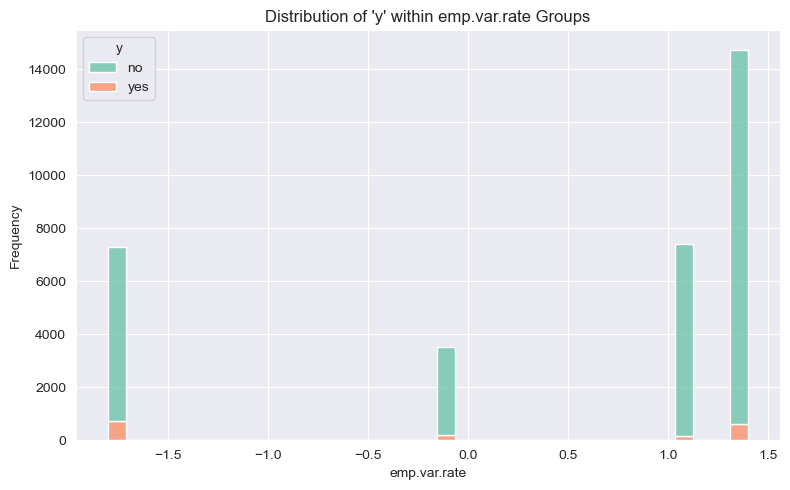

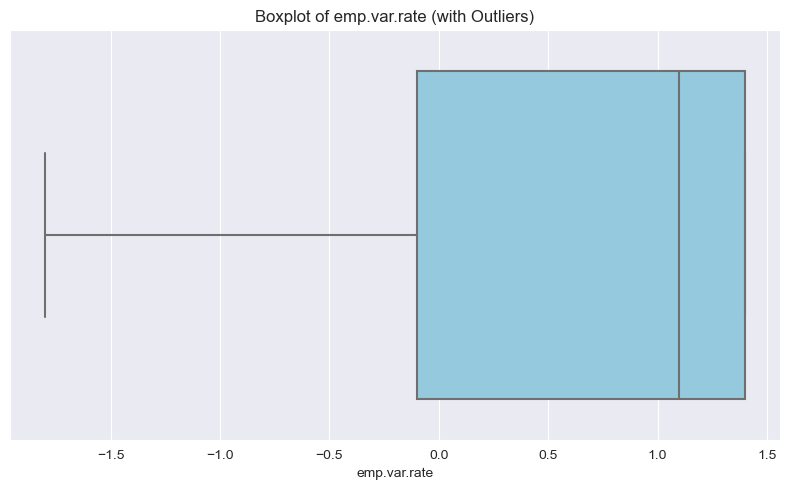

In [403]:
visualize(dataset_copy,'emp.var.rate')

##### 7-) "cons.price.idx"

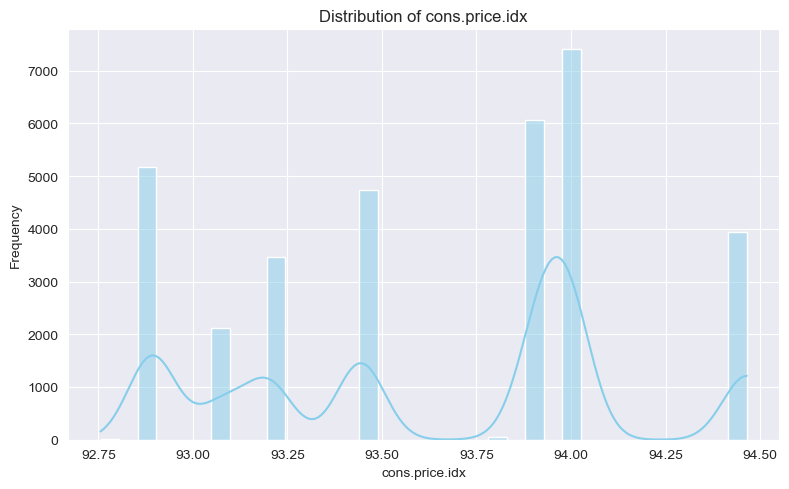

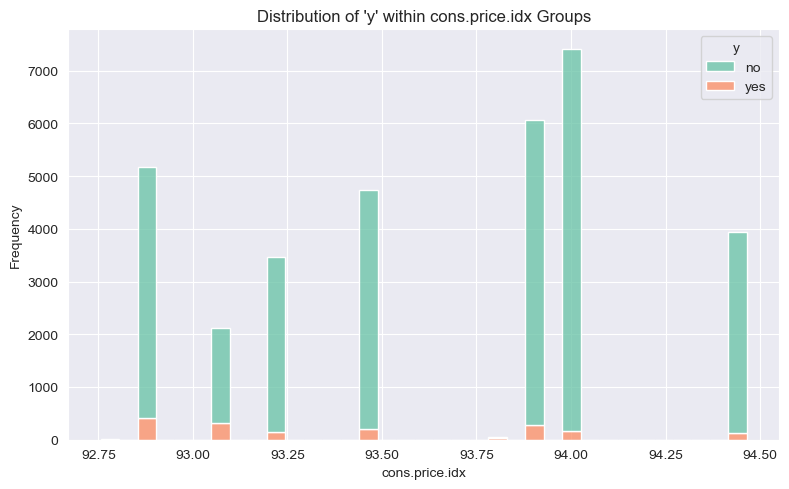

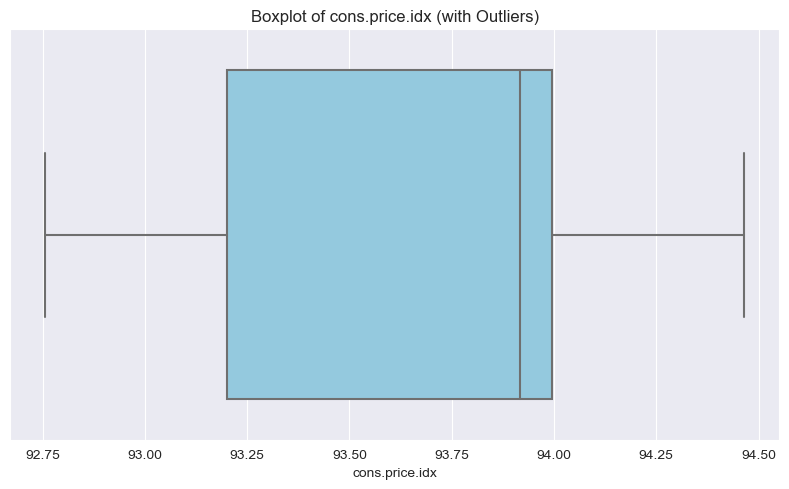

In [404]:
visualize(dataset_copy,'cons.price.idx')

##### 8-) "cons.conf.idx"

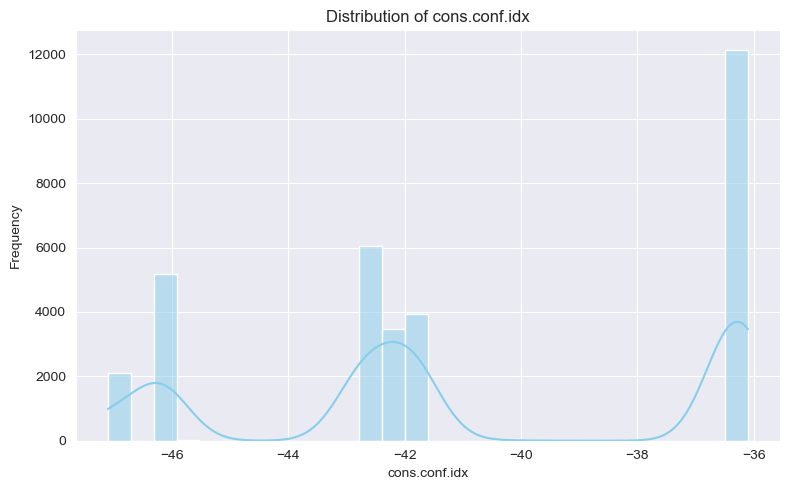

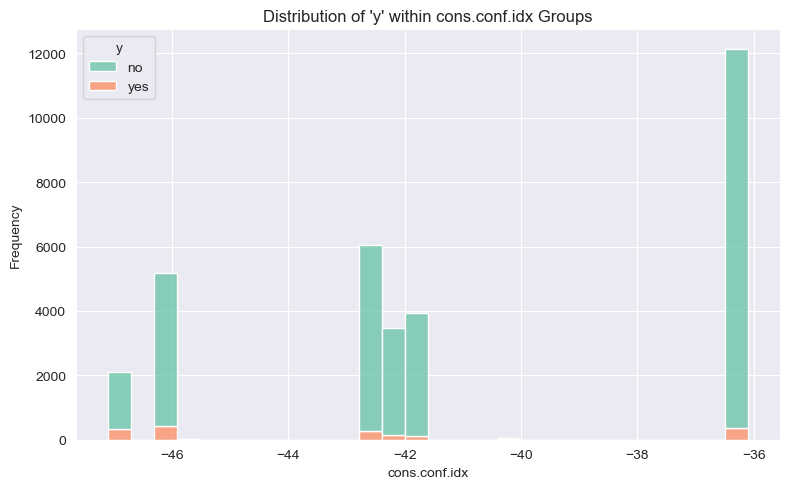

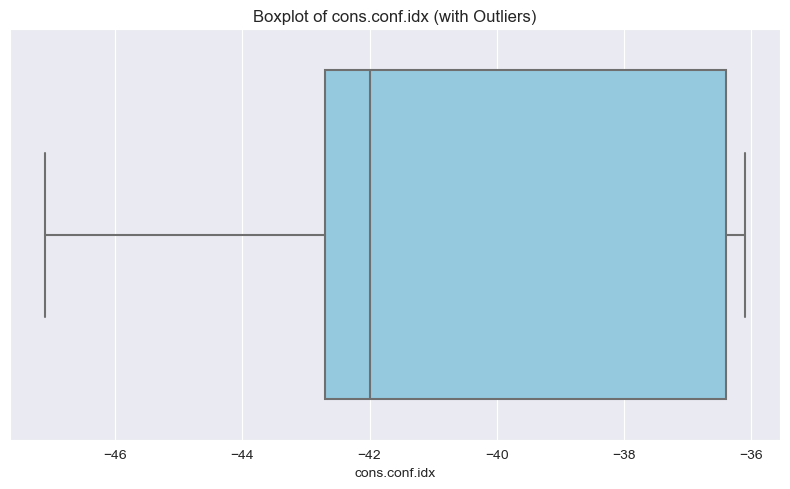

In [405]:
visualize(dataset_copy,'cons.conf.idx')

##### 9-) "euribor3m"

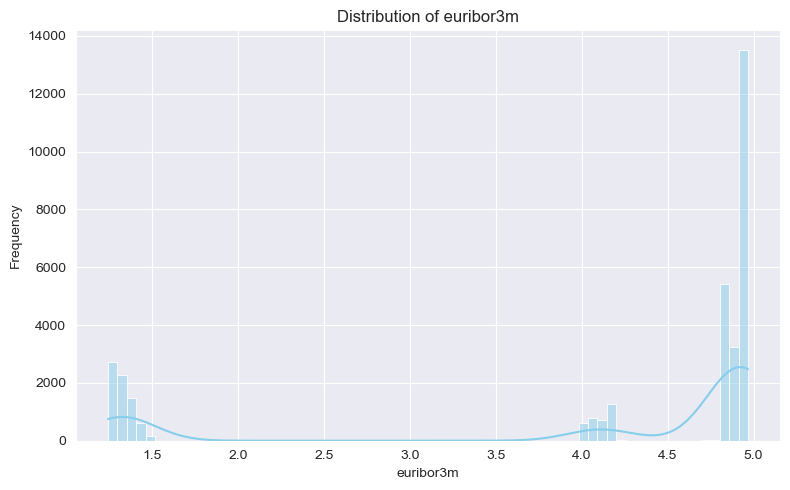

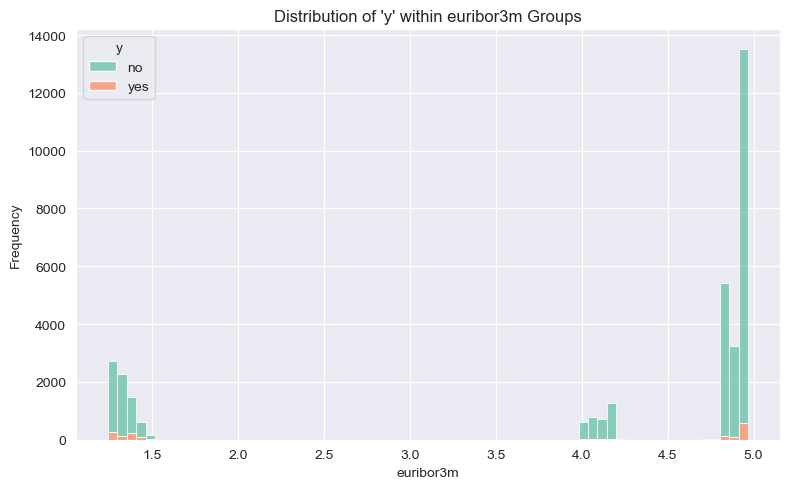

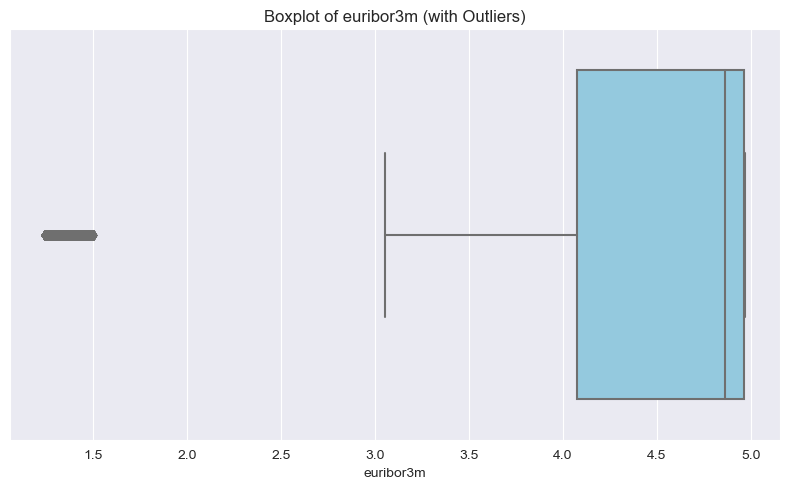

In [406]:
visualize(dataset_copy,'euribor3m')

##### 10-) "nr.employed"

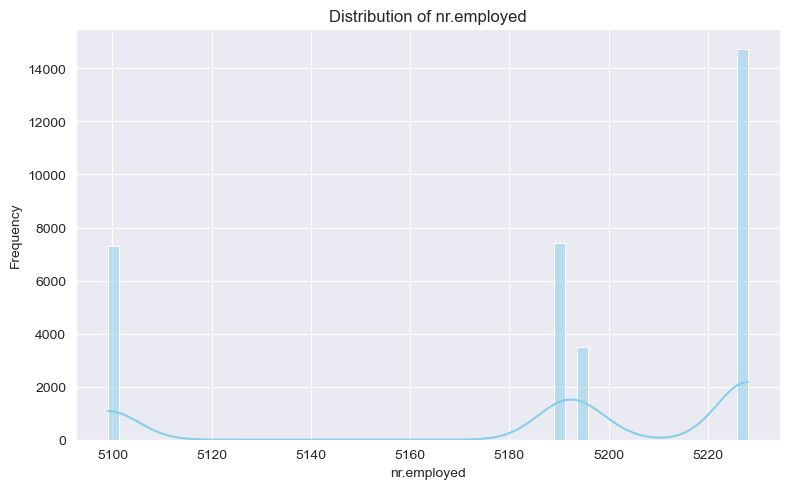

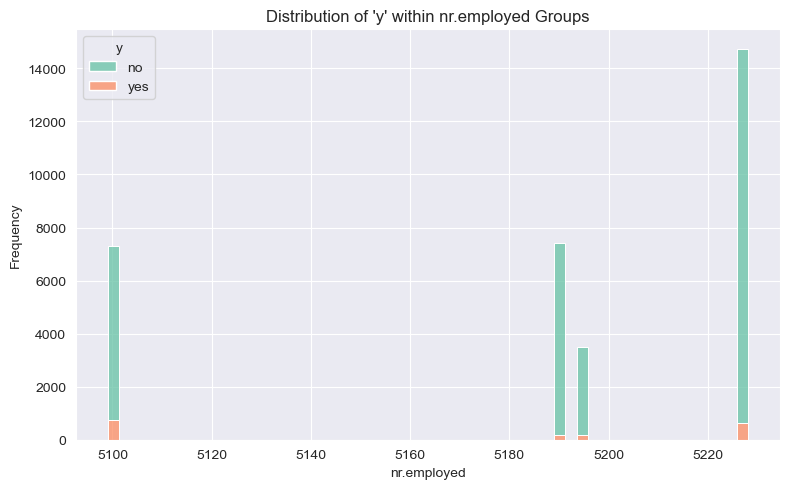

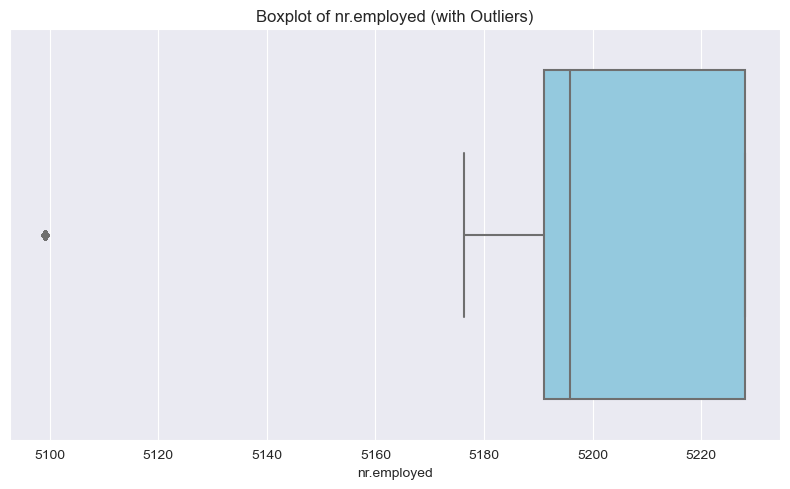

In [407]:
visualize(dataset_copy,'nr.employed')

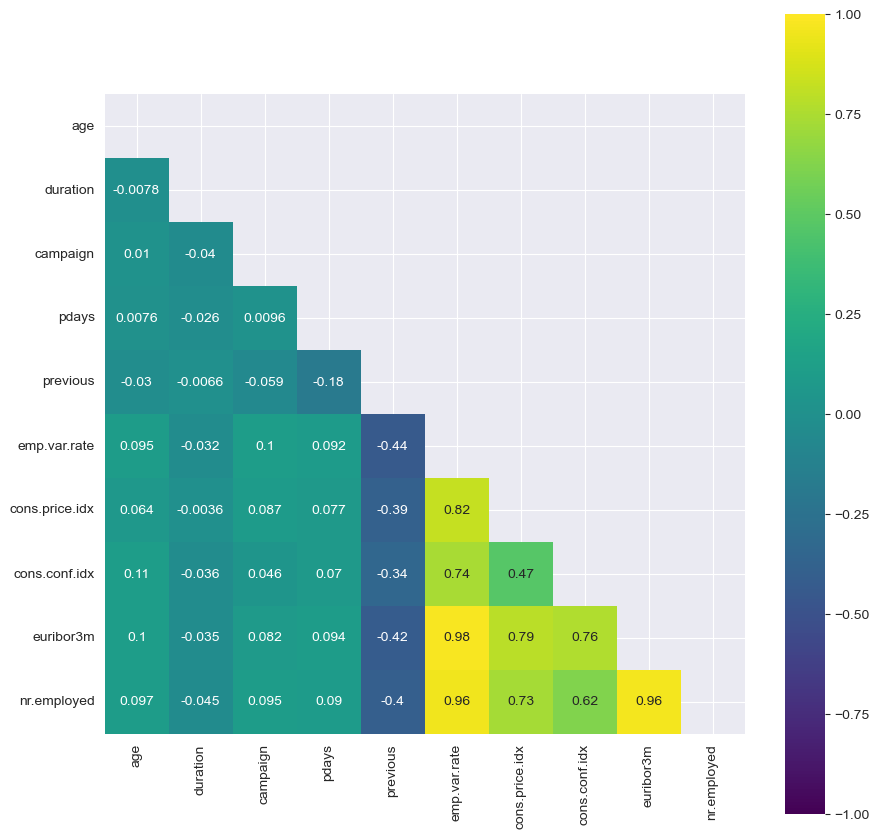

In [408]:
correlation_heatmap(dataset_copy,numerical_columns)

In [409]:
# Since there is a huge correlation between emp.var.rate and (cons.price.idx/euribor3m/nr.employed)
# we drop those features
dataset_copy = dataset_copy.drop(['cons.price.idx', 'euribor3m', 'nr.employed'], axis=1)
numerical_columns = dataset_copy.select_dtypes(include='number').columns.tolist()

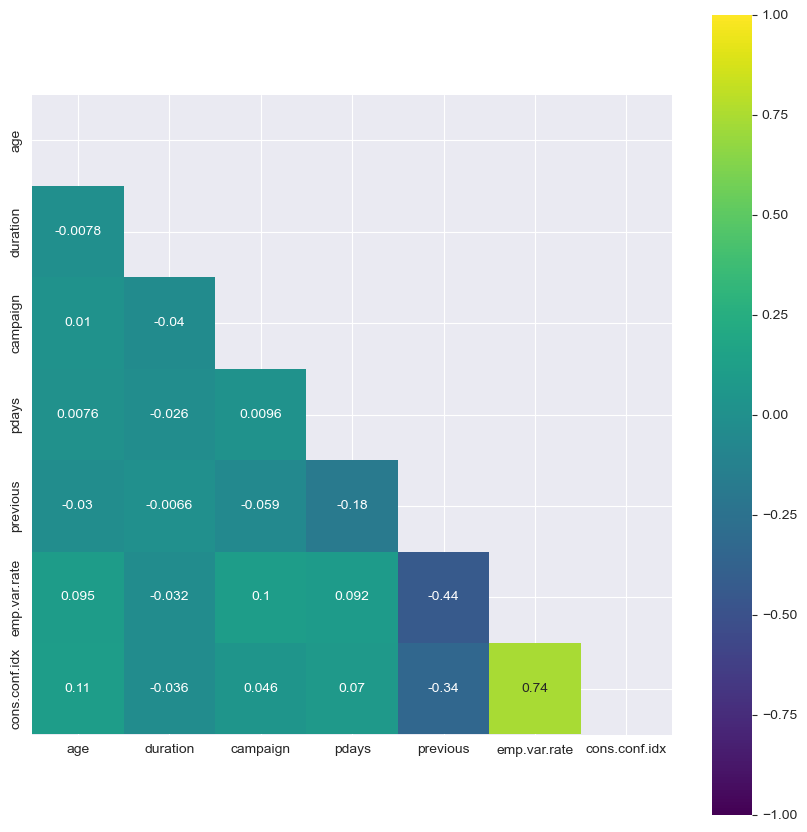

In [410]:
correlation_heatmap(dataset_copy,numerical_columns)

In [411]:
numerical_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.conf.idx']

## Feature Extraction for numerical features

##### 1-) "Age"

In [412]:
age_threshold = generate_threshold(dataset_copy,'age',5)
print(age_threshold)

[20, 25, 30, 35, 40, 45, 50, 55, 60, 65]


In [413]:
print_extract_feature_by_thresholds(dataset_copy,'age',age_threshold)

(20_25] = 0.0227, samples:748
(25_30] = 0.1359, samples:4477
(30_35] = 0.2301, samples:7583
(35_40] = 0.188, samples:6196
(40_45] = 0.1465, samples:4827
(45_50] = 0.1208, samples:3979
(50_55] = 0.0913, samples:3007
(55_60] = 0.064, samples:2109
(60_65] = 0.0007, samples:23


In [414]:
extract_feature_by_thresholds(dataset_copy,'age',age_threshold)

In [415]:
dataset_copy['age_group'].value_counts()

age_group
age_(30_35]    7583
age_(35_40]    6196
age_(40_45]    4827
age_(25_30]    4477
age_(45_50]    3979
age_(50_55]    3007
age_(55_60]    2109
age_(20_25]     748
age_(60_65]      23
Name: count, dtype: int64

##### 2-) "duration"

In [416]:
duration_threshold = generate_threshold(dataset_copy,'duration',100)
print(duration_threshold)

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]


In [417]:
duation_t = [0,100,200,700,1300]
print_extract_feature_by_thresholds(dataset_copy,'duration',duation_t)

(0_100] = 0.2409, samples:7937
(100_200] = 0.3241, samples:10678
(200_700] = 0.3937, samples:12973
(700_1300] = 0.0413, samples:1361


In [418]:
extract_feature_by_thresholds(dataset_copy,'duration',duration_threshold)

In [419]:
dataset_copy['duration_group'].value_counts()

duration_group
duration_(100_200]      10678
duration_(0_100]         7937
duration_(200_300]       5870
duration_(300_400]       3267
duration_(400_500]       1804
duration_(500_600]       1187
duration_(600_700]        845
duration_(700_800]        578
duration_(800_900]        390
duration_(900_1000]       282
duration_(1000_1100]      111
Name: count, dtype: int64

##### 3-) "pdays"

In [420]:
dataset_copy['pdays'].value_counts()

pdays
999    32845
6         29
12        23
10        21
11        16
9         10
7          3
8          2
Name: count, dtype: int64

In [421]:
dataset_copy['pdays_group'] = dataset_copy['pdays']
dataset_copy.loc[dataset_copy['pdays'] <= 100, 'pdays_group'] = 0
dataset_copy.loc[dataset_copy['pdays'] > 100, 'pdays_group'] = 1

In [422]:
dataset_copy['pdays_group'].value_counts()

pdays_group
1    32845
0      104
Name: count, dtype: int64

##### 4-) "emp.var.rate"

In [423]:
dataset_copy['emp.var.rate'].value_counts()

emp.var.rate
 1.4    14732
 1.1     7411
-1.8     7292
-0.1     3506
-0.2        8
Name: count, dtype: int64

In [424]:
dataset_copy['emp.var.rate_sign'] = dataset_copy['emp.var.rate']
dataset_copy.loc[dataset_copy['emp.var.rate'] < 0, 'emp.var.rate_sign'] = -1    # negative employment variation rate
dataset_copy.loc[dataset_copy['emp.var.rate'] > 0, 'emp.var.rate_sign'] = 1     # positive employment variation rate

In [425]:
dataset_copy['emp.var.rate_sign'].value_counts()

emp.var.rate_sign
 1.0    22143
-1.0    10806
Name: count, dtype: int64

##### 5-) "cons.conf.idx"

In [426]:
cons_conf_idx_threshold = generate_threshold(dataset_copy,'cons.conf.idx',5)
print(cons_conf_idx_threshold)

[-50.0, -45.0, -40.0, -35.0]


In [427]:
print_extract_feature_by_thresholds(dataset_copy,'cons.conf.idx',cons_conf_idx_threshold)

(-50.0_-45.0] = 0.2216, samples:7300
(-45.0_-40.0] = 0.41, samples:13508
(-40.0_-35.0] = 0.3685, samples:12141


In [428]:
extract_feature_by_thresholds(dataset_copy,'cons.conf.idx',cons_conf_idx_threshold)

In [429]:
dataset_copy['cons.conf.idx_group'].value_counts()

cons.conf.idx_group
cons.conf.idx_(-45.0_-40.0]    13508
cons.conf.idx_(-40.0_-35.0]    12141
cons.conf.idx_(-50.0_-45.0]     7300
Name: count, dtype: int64

## Encoding the numerical features

In [430]:
dataset_copy.dtypes

age                       int64
duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.conf.idx           float64
job                    category
marital                category
education              category
default                category
housing                category
loan                   category
contact                category
month                  category
day_of_week            category
poutcome               category
y                      category
age_group                object
duration_group           object
pdays_group               int64
emp.var.rate_sign       float64
cons.conf.idx_group      object
dtype: object

In [431]:
from sklearn.preprocessing import LabelEncoder
label_encoded_features = ['age_group','duration_group','cons.conf.idx_group']
label_encoder = LabelEncoder()

for column in label_encoded_features:
    dataset_copy[column] = label_encoder.fit_transform(dataset_copy[column])

In [432]:
for column in label_encoded_features:
    print(dataset_copy[column].value_counts())

age_group
2    7583
3    6196
4    4827
1    4477
5    3979
6    3007
7    2109
0     748
8      23
Name: count, dtype: int64
duration_group
2     10678
0      7937
3      5870
4      3267
5      1804
6      1187
7       845
8       578
9       390
10      282
1       111
Name: count, dtype: int64
cons.conf.idx_group
1    13508
0    12141
2     7300
Name: count, dtype: int64


In [433]:
dataset_copy.dtypes

age                       int64
duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.conf.idx           float64
job                    category
marital                category
education              category
default                category
housing                category
loan                   category
contact                category
month                  category
day_of_week            category
poutcome               category
y                      category
age_group                 int32
duration_group            int32
pdays_group               int64
emp.var.rate_sign       float64
cons.conf.idx_group       int32
dtype: object

### Dealing with the categorical columns

In [434]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

##### 1-) "job"

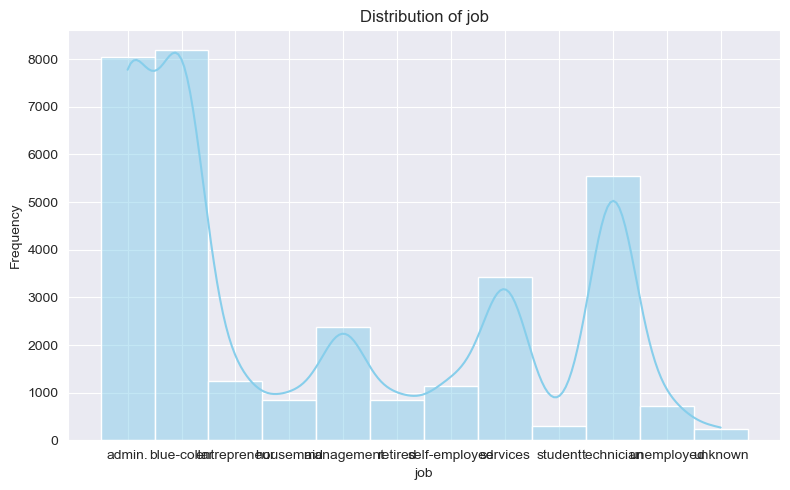

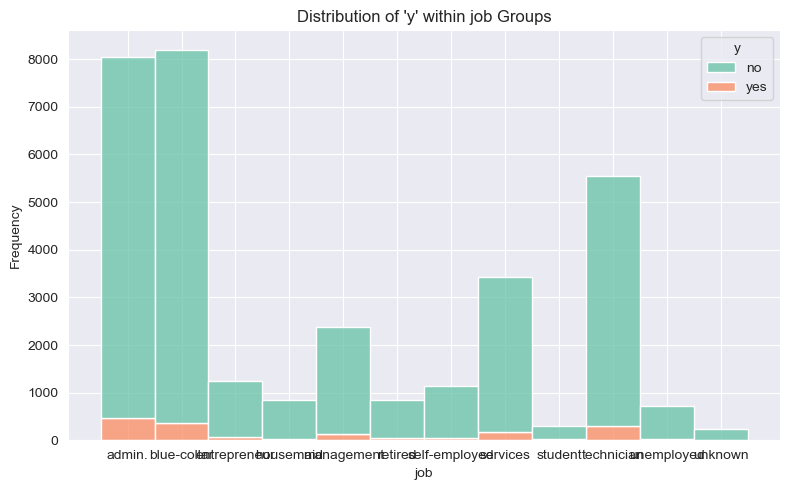

In [435]:
visualize_features(dataset_copy,'job')
visualize_target_feature(dataset_copy,'job')

##### 2-) "marital"

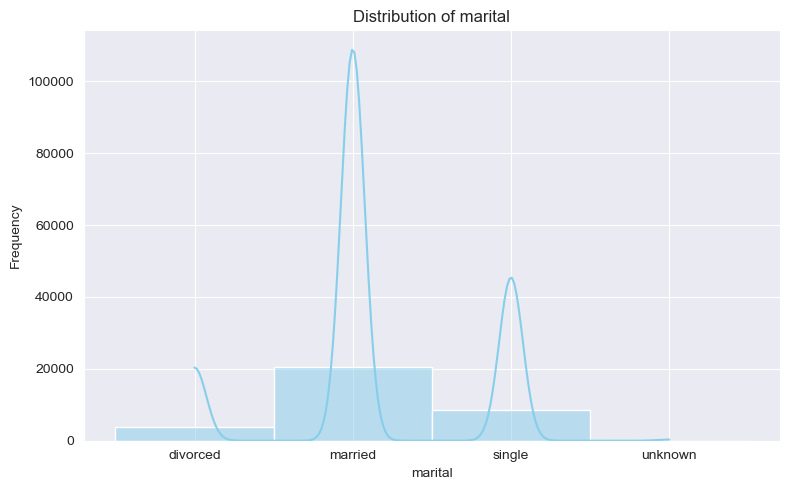

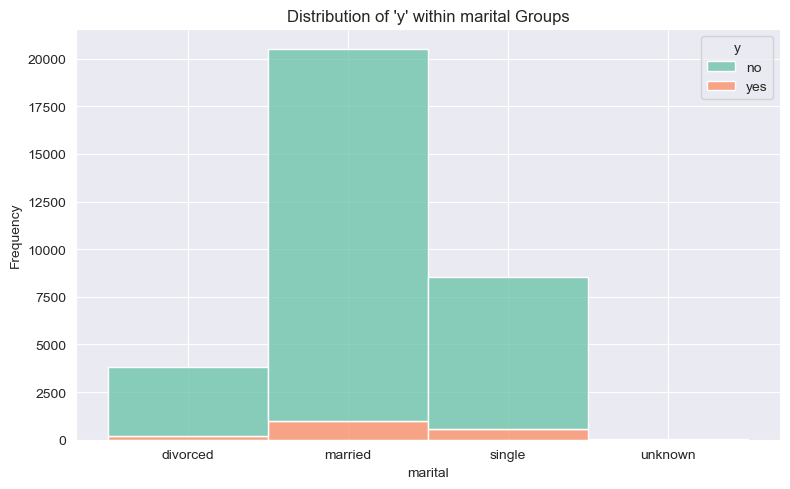

In [436]:
visualize_features(dataset_copy,'marital')
visualize_target_feature(dataset_copy,'marital')

##### 3-) "education"

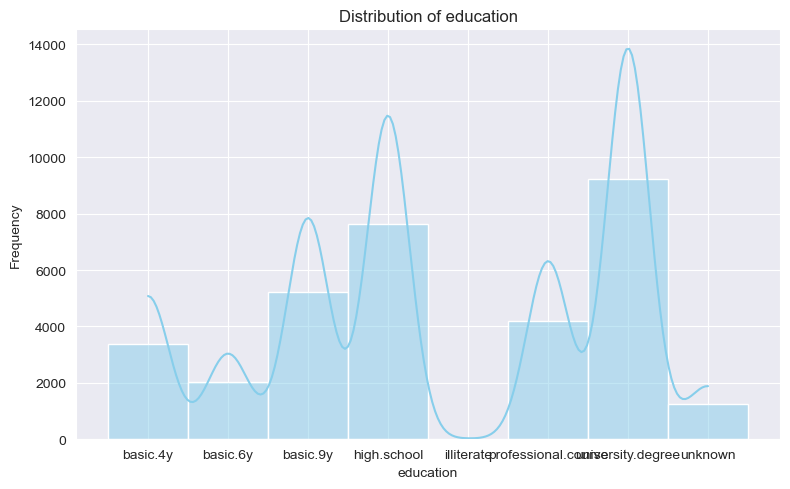

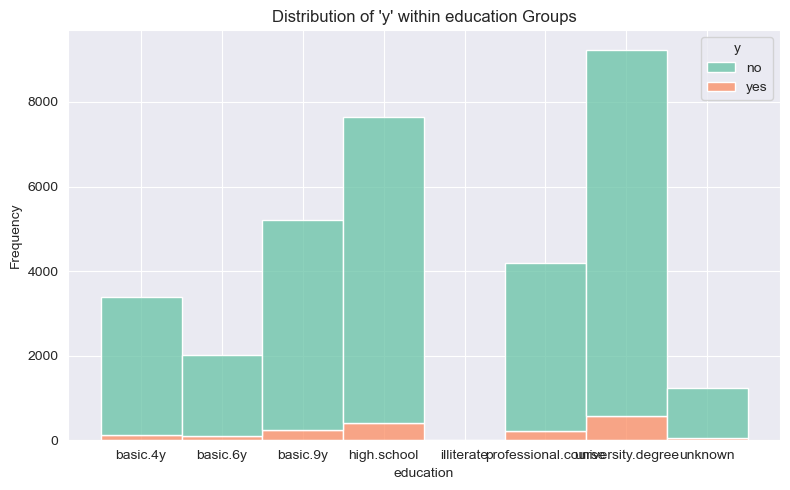

In [437]:
visualize_features(dataset_copy,'education')
visualize_target_feature(dataset_copy,'education')

##### 4-) "default"

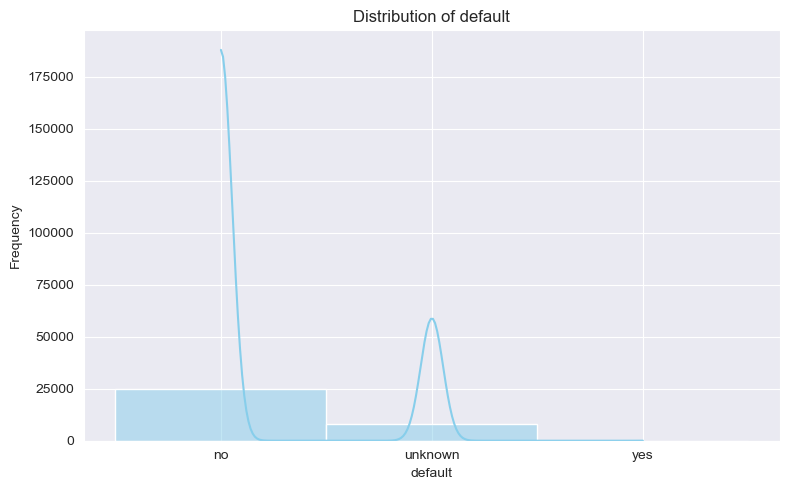

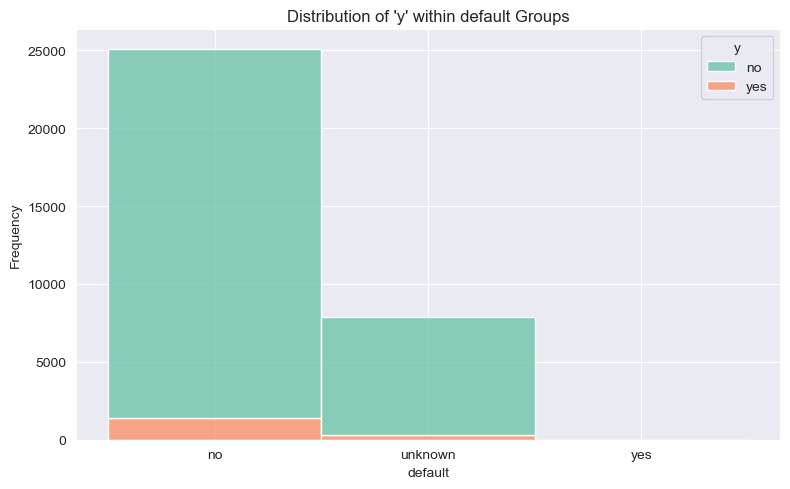

In [438]:
visualize_features(dataset_copy,'default')
visualize_target_feature(dataset_copy,'default')

##### 5-) "housing"

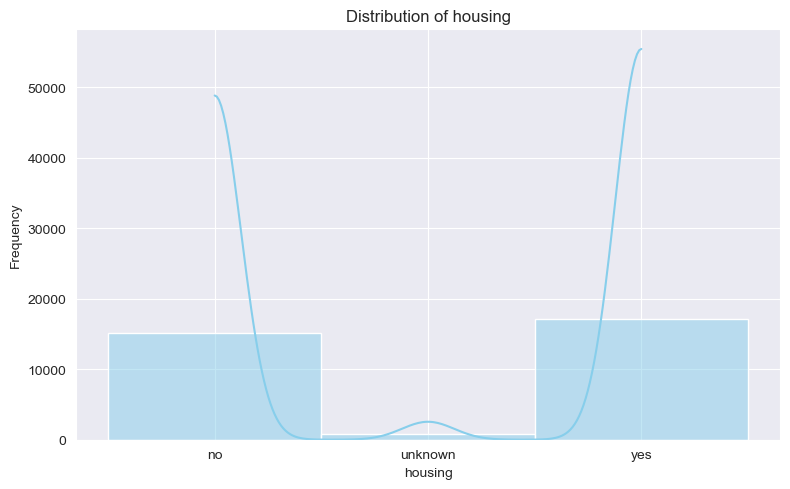

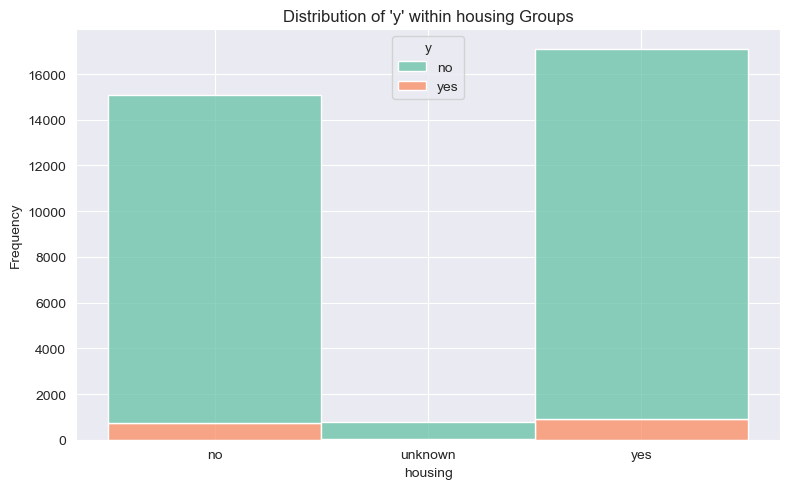

In [439]:
visualize_features(dataset_copy,'housing')
visualize_target_feature(dataset_copy,'housing')

##### 6-) "loan"

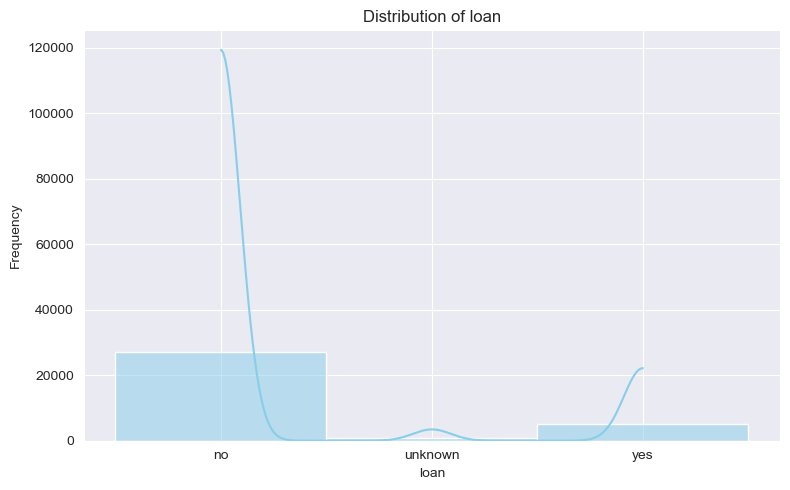

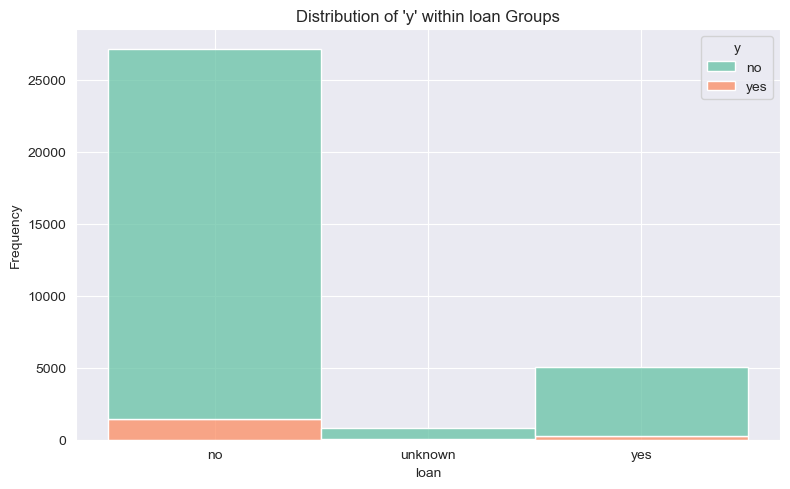

In [440]:
visualize_features(dataset_copy,'loan')
visualize_target_feature(dataset_copy,'loan')

##### 7-) "contact"

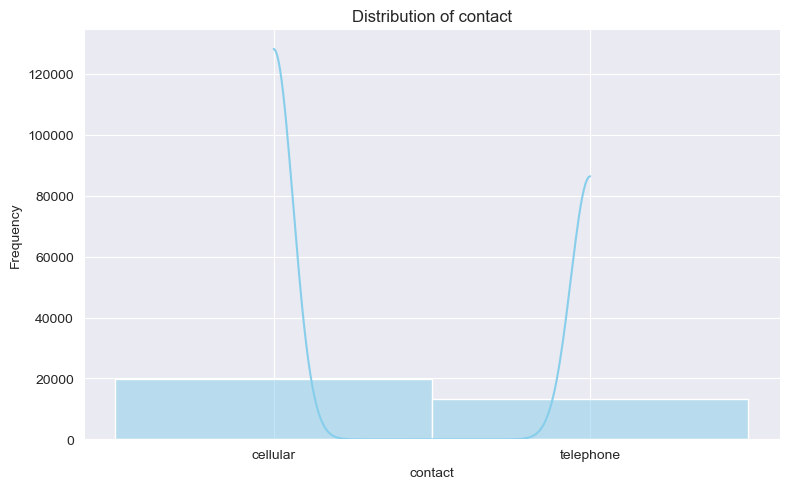

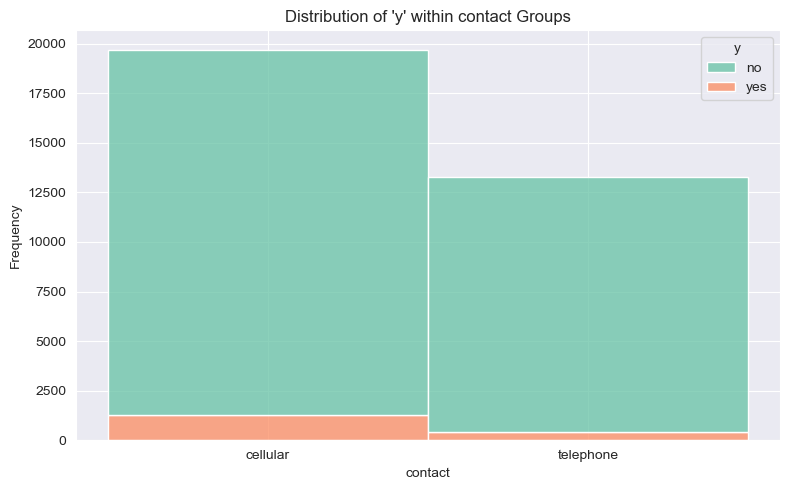

In [441]:
visualize_features(dataset_copy,'contact')
visualize_target_feature(dataset_copy,'contact')

##### 8-) "month"

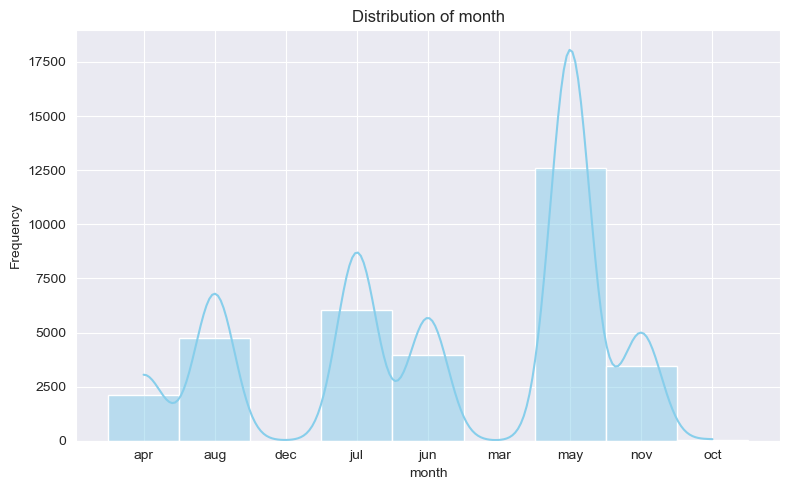

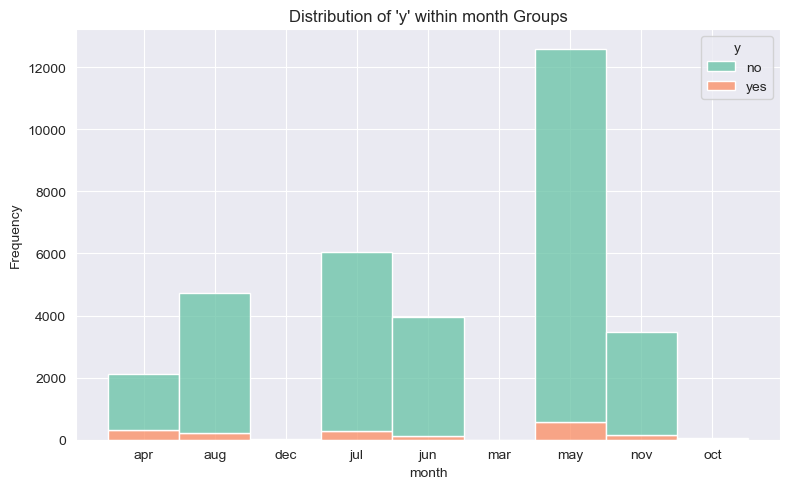

In [442]:
visualize_features(dataset_copy,'month')
visualize_target_feature(dataset_copy,'month')

##### 9-) "day_of_week"

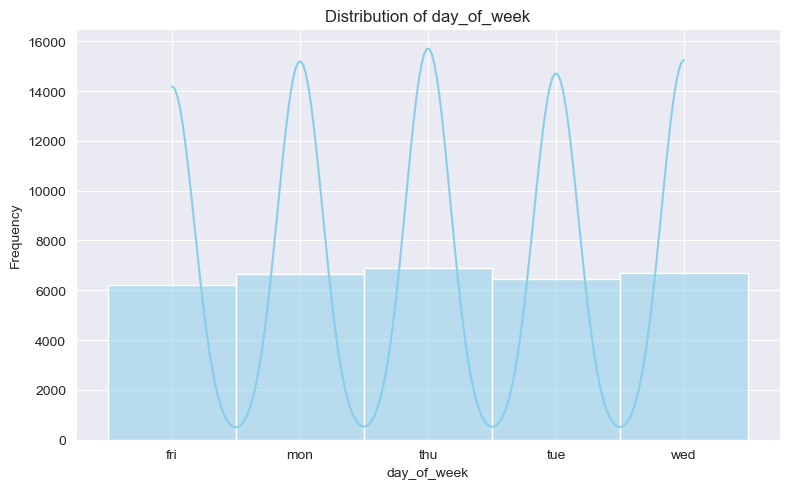

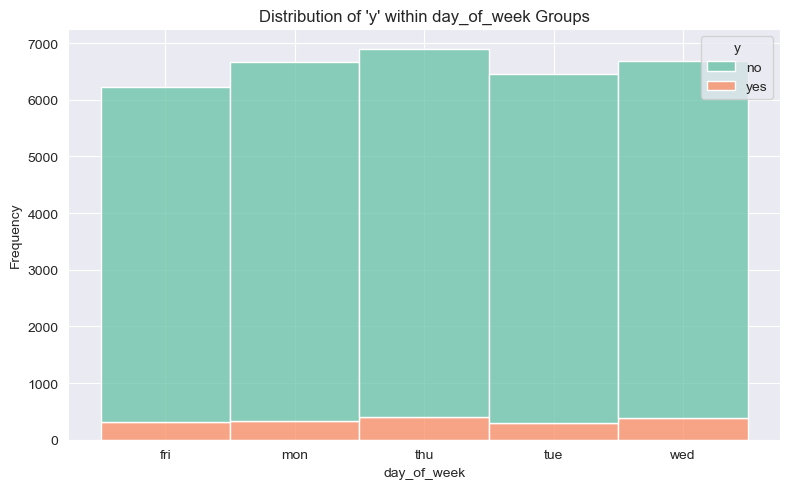

In [443]:
visualize_features(dataset_copy,'day_of_week')
visualize_target_feature(dataset_copy,'day_of_week')

##### 10-) "y"

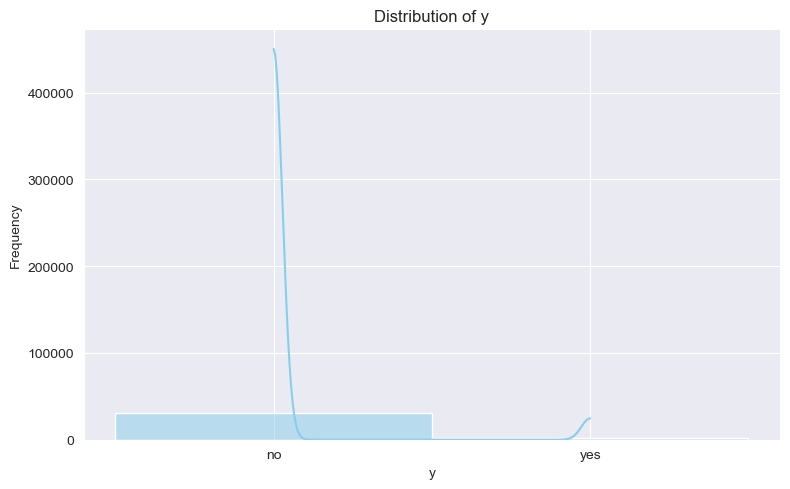

In [444]:
visualize_features(dataset_copy,'y')

### Handling missing values

In [445]:
dataset_copy.replace('unknown', np.nan, inplace=True)
dataset_copy.fillna(dataset_copy.mode().iloc[0], inplace=True)

## Encoding the categorical dataset

In [446]:
dataset_copy.dtypes

age                       int64
duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.conf.idx           float64
job                    category
marital                category
education              category
default                category
housing                category
loan                   category
contact                category
month                  category
day_of_week            category
poutcome               category
y                      category
age_group                 int32
duration_group            int32
pdays_group               int64
emp.var.rate_sign       float64
cons.conf.idx_group       int32
dtype: object

In [447]:
label_encoded_features = ['education','default','housing','loan','month','day_of_week','poutcome','marital','contact','y']
onehot_encoded_features = ['job']

In [448]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in label_encoded_features:
    dataset_copy[column] = label_encoder.fit_transform(dataset_copy[column])

In [449]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(dtype='int32')
for col in onehot_encoded_features:
    transformed = ohe.fit_transform(dataset_copy[[col]])
    dataset_copy[ohe.categories_[0]] = transformed.toarray()

In [450]:
dataset_copy.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,job,marital,education,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,56,261,1,999,0,1.1,-36.4,housemaid,1,0,...,0,0,1,0,0,0,0,0,0,0
1,57,149,1,999,0,1.1,-36.4,services,1,3,...,0,0,0,0,0,0,1,0,0,0
2,37,226,1,999,0,1.1,-36.4,services,1,3,...,0,0,0,0,0,0,1,0,0,0
3,40,151,1,999,0,1.1,-36.4,admin.,1,1,...,0,0,0,0,0,0,0,0,0,0
4,56,307,1,999,0,1.1,-36.4,services,1,3,...,0,0,0,0,0,0,1,0,0,0


In [451]:
dataset_copy.dtypes

age                       int64
duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.conf.idx           float64
job                    category
marital                   int32
education                 int32
default                   int32
housing                   int32
loan                      int32
contact                   int32
month                     int32
day_of_week               int32
poutcome                  int32
y                         int32
age_group                 int32
duration_group            int32
pdays_group               int64
emp.var.rate_sign       float64
cons.conf.idx_group       int32
admin.                    int32
blue-collar               int32
entrepreneur              int32
housemaid                 int32
management                int32
retired                   int32
self-employed             int32
services                  int32
student 

<Axes: >

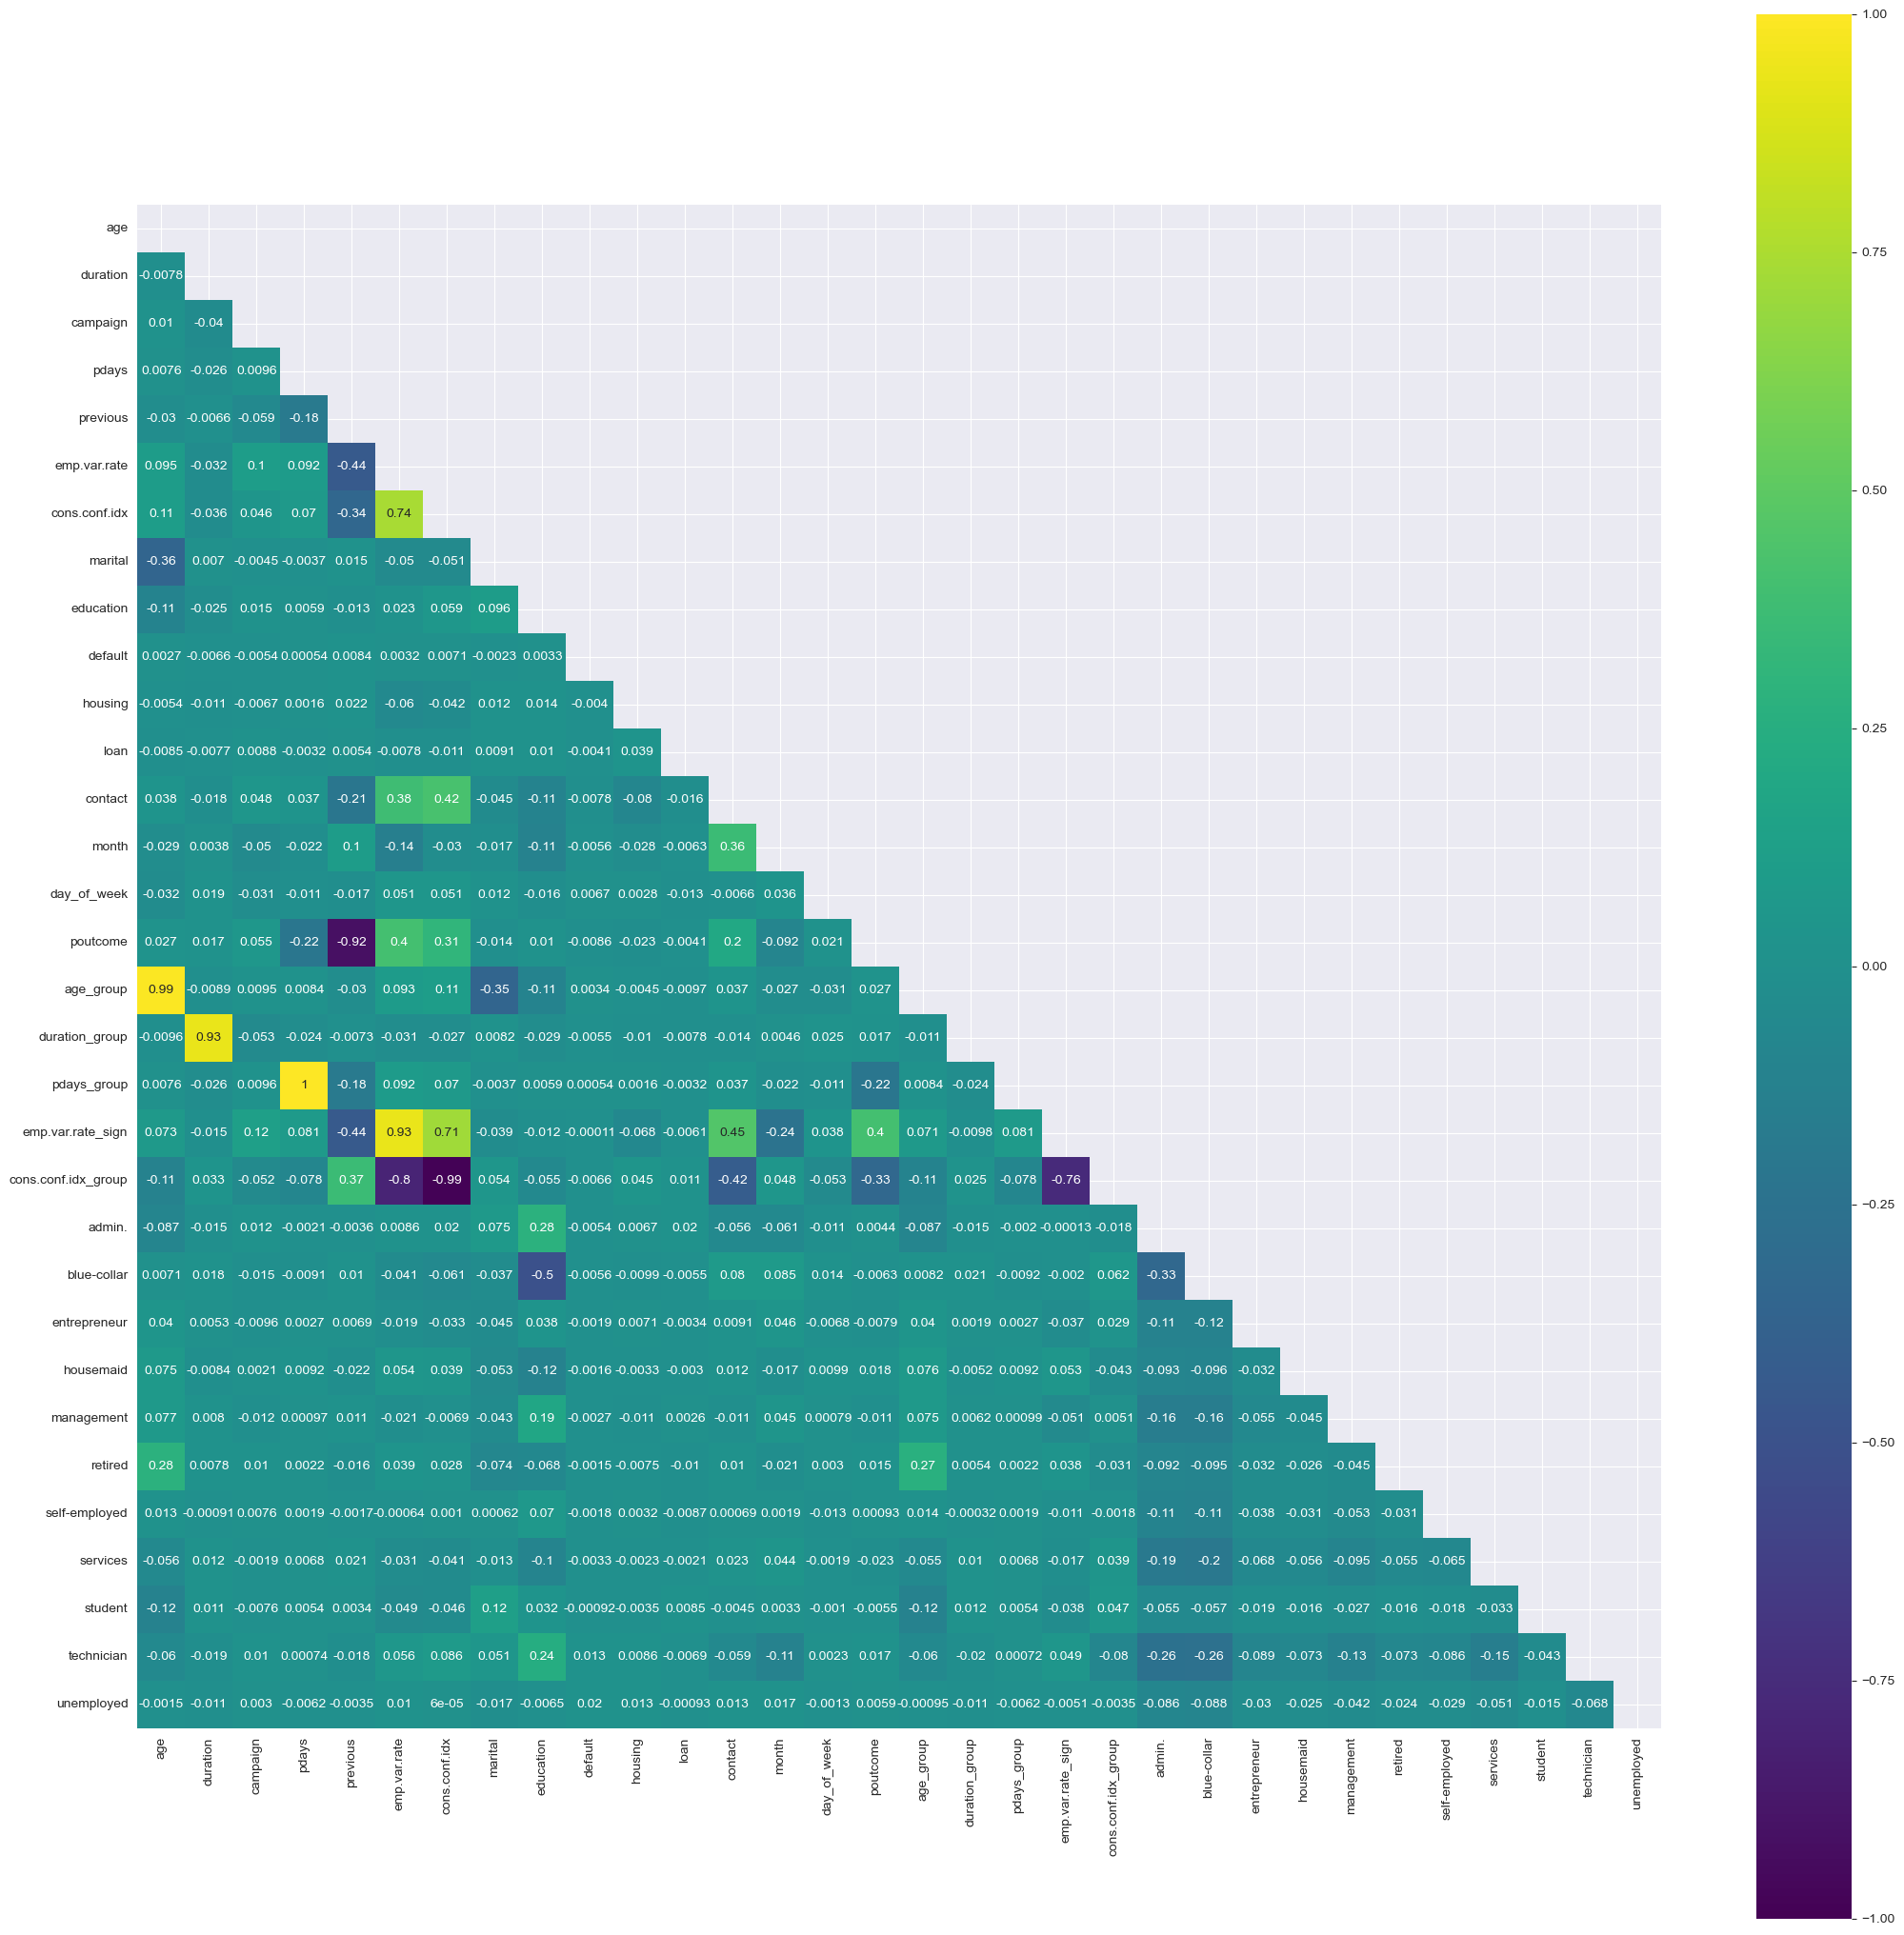

In [452]:
fig= plt.figure(figsize=(20,20))
df = dataset_copy.drop(['y','job'], axis=1)
corr = df.corr()
mask = np.triu(df.corr())

axes = fig.add_axes([0, 0, 1, 1])
sns.heatmap(corr, annot=True, mask=mask, square=True,fmt='.2g',vmin=-1, vmax=1, center= 0, cmap='viridis',
            linecolor='white', cbar_kws= {'orientation': 'vertical'}, ax=axes)

In [453]:
dataset_copy.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.conf.idx', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y', 'age_group',
       'duration_group', 'pdays_group', 'emp.var.rate_sign',
       'cons.conf.idx_group', 'admin.', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed'],
      dtype='object')

In [454]:
selected_features = ['age_group','duration_group','campaign','pdays_group','previous','emp.var.rate_sign','cons.conf.idx_group',
                     'marital','default','housing','loan','contact','month','day_of_week','poutcome','admin.', 'blue-collar', 'entrepreneur',
                     'housemaid', 'management', 'retired', 'self-employed', 'services',
                     'student', 'technician', 'unemployed','y']
dataset_selected = dataset_copy[selected_features].copy()

In [455]:
dataset_selected.shape

(32949, 27)

In [456]:
dataset_selected.head()

,age_group,duration_group,campaign,pdays_group,previous,emp.var.rate_sign,cons.conf.idx_group,marital,default,housing,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,y
0,7,3,1,1,0,1.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,7,2,1,1,0,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,3,1,1,0,1.0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,3,2,1,1,0,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,4,1,1,0,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [457]:
# for col in selected_features:
#     visualize_features(dataset_selected,col)

In [458]:
dataset_selected.describe()

,age_group,duration_group,campaign,pdays_group,previous,emp.var.rate_sign,cons.conf.idx_group,marital,default,housing,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,y
count,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,...,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,3.351331,2.584479,2.304228,0.996844,0.085951,0.344077,0.853076,1.143282,0.000091,0.542839,...,0.038059,0.025919,0.071869,0.025524,0.034902,0.104131,0.009196,0.168260,0.022155,0.051807
std,1.829514,2.160969,1.730003,0.056094,0.280296,0.938956,0.753965,0.596074,0.009542,0.498169,...,0.191341,0.158896,0.258274,0.157714,0.183535,0.305435,0.095455,0.374103,0.147191,0.221641
min,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,3.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,10.000000,10.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [459]:
dataset_copy.shape

(32949, 34)

In [460]:
X = dataset_copy.drop(['y','job'], axis=1)
y = dataset_selected['y']

In [461]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,marital,education,default,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,56,261,1,999,0,1.1,-36.4,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,57,149,1,999,0,1.1,-36.4,1,3,0,...,0,0,0,0,0,0,1,0,0,0
2,37,226,1,999,0,1.1,-36.4,1,3,0,...,0,0,0,0,0,0,1,0,0,0
3,40,151,1,999,0,1.1,-36.4,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,56,307,1,999,0,1.1,-36.4,1,3,0,...,0,0,0,0,0,0,1,0,0,0


In [462]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [463]:
X.dtypes

age                      int64
duration                 int64
campaign                 int64
pdays                    int64
previous                 int64
emp.var.rate           float64
cons.conf.idx          float64
marital                  int32
education                int32
default                  int32
housing                  int32
loan                     int32
contact                  int32
month                    int32
day_of_week              int32
poutcome                 int32
age_group                int32
duration_group           int32
pdays_group              int64
emp.var.rate_sign      float64
cons.conf.idx_group      int32
admin.                   int32
blue-collar              int32
entrepreneur             int32
housemaid                int32
management               int32
retired                  int32
self-employed            int32
services                 int32
student                  int32
technician               int32
unemployed               int32
dtype: o

## Dealing with Imbalance dataset

In [464]:
# !pip install --upgrade scikit-learn
# !pip install --upgrade imbalanced-learn


In [465]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


In [466]:
# summarize class distribution
counter = Counter(y)
print(counter)
print(Counter(X['admin.']))
# transform the dataset
oversample = SMOTE()
X_new, y_new = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_new)
print(counter)

Counter({0: 31242, 1: 1707})
Counter({0: 24908, 1: 8041})
Counter({0: 31242, 1: 31242})


In [90]:
print(Counter(X_new['age_group']))

Counter({1: 11946, 2: 8039, 0: 5254, 3: 5151, 4: 4792, 5: 3063, 6: 379})


## Normatlization

In [91]:
from sklearn.preprocessing import MinMaxScaler
# Apply Min_Max scaler
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X_new)

In [95]:
pd.DataFrame(X_minmax).dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
dtype: object

In [96]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [97]:
X_new.shape

(38624, 32)

In [432]:
# Scale the features to ensure non-negativity
def func_MIN_MAX_SCALER(X):
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    return X

In [433]:
# Prepare dataset for RFE (Recursive Feature Elimination)
def func_RFE_X_rfe(X):
    model = LogisticRegression(max_iter=1000)
    rfe = RFE(model, step = 4)
    fit = rfe.fit(X, y_new)
    selected_features = fit.support_
    X_rfe = X[:, selected_features]
    print("Num Features: %s" % (fit.n_features_))
    print("Selected Features: %s" % (fit.support_))
    print("Feature Ranking: %s" % (fit.ranking_))
    return X_rfe

In [434]:
# Prepare dataset for SelectKBest (score_func=chi2)
def func_SelectKBest_X_chi2(X):
    test = SelectKBest(score_func=chi2, k=31)
    fit = test.fit(X, y_new)
    X_chi2 = fit.transform(X)
    return X_chi2

In [435]:
# Prepare dataset for Ridge
def func_Ridge_X_ridge(X):
    ridge = Ridge(alpha=1.0)
    ridge.fit(X,y_new)
    best_alpha = ridge.alpha
    ridge_model = Ridge(alpha=best_alpha)
    ridge_model.fit(X,y_new)
    selector = SelectFromModel(ridge_model)
    X_ridge = selector.transform(X)
    return X_ridge

In [436]:
# Prepare dataset for MIC (mutual_info_classif)
def func_MIC_X_mic(X):
    mi_scores = MIC(X,y_new)
    mi_score_selected_index = np.where(mi_scores <0.2)[0]
    X_mic = X[:,mi_score_selected_index]
    mi_scores
    return X_mic

In [443]:

def func_Calculate_Model_Scores(X, y, X_chi2, X_rfe, X_ridge, X_mic):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test                         = train_test_split(X, y, random_state=0, stratify=y)
    X_train_chi2, X_test_chi2, y_train_chi2, y_test_chi2     = train_test_split(X_chi2, y, random_state=0, stratify=y)
    X_train_RFE, X_test_RFE, y_train_RFE, y_test_RFE         = train_test_split(X_rfe, y, random_state=0, stratify=y)
    X_train_Ridge, X_test_Ridge, y_train_Ridge, y_test_Ridge = train_test_split(X_ridge, y, random_state=0, stratify=y)
    X_train_MIC, X_test_MIC, y_train_MIC, y_test_MIC         = train_test_split(X_mic, y, random_state=0, stratify=y)
    RFC = RandomForestClassifier()
    # Compare results with Decision Tree Classifier
    model_default = RFC.fit(X_train,y_train)
    score_default = model_default.score(X_test,y_test)
    y_predict_default = model_default.predict(X_test)
    print(recall_score(y_predict_default, y_test))
    print(precision_score(y_predict_default, y_test))

    model_MIC = RFC.fit(X_train_MIC,y_train_MIC)
    score_MIC = model_MIC.score(X_test_MIC,y_test_MIC)

    model_chi2 = RFC.fit(X_train_chi2,y_train_chi2)
    score_chi2 = model_chi2.score(X_test_chi2,y_test_chi2)

    model_RFE = RFC.fit(X_train_RFE,y_train_RFE)
    score_RFE = model_RFE.score(X_test_RFE,y_test_RFE)

    model_Ridge = RFC.fit(X_train_Ridge,y_train_Ridge)
    score_Ridge = model_Ridge.score(X_test_Ridge,y_test_Ridge)

    print(f"score_default: \t{score_default}")
    print(f"score_MIC:     \t{score_MIC}")
    print(f"score_chi2:    \t{score_chi2}")
    print(f"score_RFE:     \t{score_RFE}")
    print(f"score_Ridge:   \t{score_Ridge}")

In [444]:
x_chi2 = func_SelectKBest_X_chi2(X_minmax)
x_rfe = func_Ridge_X_ridge(X_minmax)
x_ridge = func_Ridge_X_ridge(X_minmax)
x_mic = func_MIC_X_mic(X_minmax)

func_Calculate_Model_Scores(X_minmax, y_new, x_chi2, x_rfe, x_ridge, x_mic)

0.9964494569757728
0.9881938690969345
score_default: 	0.9923363711681856
score_MIC:     	0.9857083678541839
score_chi2:    	0.9923363711681856
score_RFE:     	0.9843620546810273
score_Ridge:   	0.9840513670256835


In [ ]:
im